In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from PIL import Image
import requests
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from os import path


In [2]:
df =pd.read_csv('./data/pokemon.csv')

In [4]:
df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [3]:
df_name = df['Name']

In [5]:
class FeatureExtractor:
    def __init__(self):
       
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [5]:
fe = FeatureExtractor()
features = []
img_paths = []


for i in df_name:
    try:
        image_path = f"./data/images/{i}.png"
        if not path.exists(image_path):
            image_path = f"./data/images/{i}.jpg"
        img = Image.open(image_path)
        feature = fe.extract(img)
        img_paths.append(image_path)
        features.append(feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)
   

c:\Users\kpes2\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 89ms/step


In [6]:
fe = FeatureExtractor()
features = []
img_paths = []
for i in df_name:
    try:
        img_paths = f"./data/images/{i}.png"
        if not path.exists(img_paths):
            img_paths = f"./data/images/{i}.jpg"
        img = Image.open(img_paths)
        feature = fe.extract(img)
        img_paths.append(img_paths)
        features.append(feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

In [7]:


img = Image.open("./data/images/araquanid.jpg")
query = fe.extract(img)       #이미지의 특징(feature)를 추출
dists = np.linalg.norm(features - query, axis=1) #  변수에서 추출한 이미지 특징들과 query의 이미지 특징 간의 유클리드 거리를 계산
ids = np.argsort(dists)[:30] # 배열을 정렬하고, 가장 작은 거리값을 가진 상위 30개의 이미지에 해당하는 인덱스를 ids 변수에 저장
scores = [(dists[id], self.img_paths[id], id) for id in ids] #검색 결과를 scores 리스트에 저장
axes=[] # 이미지를 시각화하기 위한 빈 그림(figure)과 서브플롯(axes)을 생성
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/num" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 101ms/step


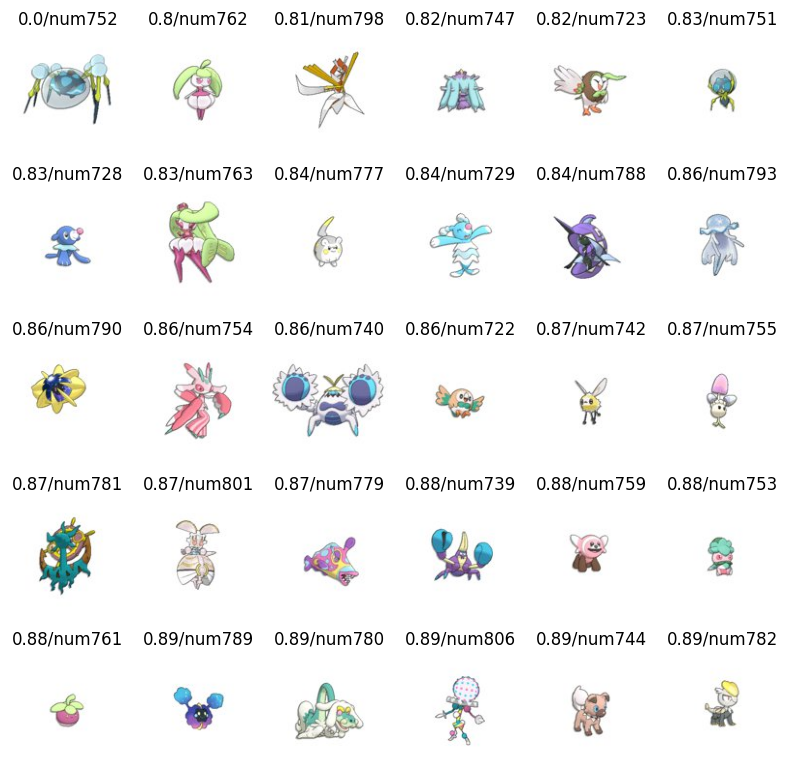

In [6]:
img = Image.open("./data/images/araquanid.jpg")
query = fe.extract(img)       #이미지의 특징(feature)를 추출
dists = np.linalg.norm(features - query, axis=1) #  변수에서 추출한 이미지 특징들과 query의 이미지 특징 간의 유클리드 거리를 계산
ids = np.argsort(dists)[:30] # 배열을 정렬하고, 가장 작은 거리값을 가진 상위 30개의 이미지에 해당하는 인덱스를 ids 변수에 저장
scores = [(dists[id], img_paths[id], id) for id in ids] #검색 결과를 scores 리스트에 저장
axes=[] # 이미지를 시각화하기 위한 빈 그림(figure)과 서브플롯(axes)을 생성
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/num" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()
